In [2]:
# libs
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.preprocessing import OneHotEncoder
from IPython.display import display

 EL OBJETIVO DEL ANALISIS ES ENCONTRAR INSIGHT PARA LA EMPRESA Y <br>
 POR ULTIMO REALIZAR UN MODELO DE ML PARA PREDECIR LA BAJA DE UNA POLIZA DE SEGURO <br>
 THE MAIN GOALS IS FIND INSIGHT IN THE DATASET FOR THE COMPANY<br>
 AND FOR LAST MAKE A MACHINE MODEL TO PREDICT WITCH CLIENT WILL REMOVE HIS INSURE.<br>

In [3]:
# reads the data
# Taken from https://www.kaggle.com/code/ycanario/home-insurance-in-r/notebook
df = pd.read_csv('home_insurance.csv')

In [4]:
pd.set_option('display.max_columns', 75)
pd.set_option('display.max_rows', 50)
# see file --> understandingData.txt

In [5]:
# checking de info in the dataset
print(df.shape)
df.head(5)
#print(df.info())

(256136, 66)


,QUOTE_DATE,COVER_START,CLAIM3YEARS,P1_EMP_STATUS,P1_PT_EMP_STATUS,BUS_USE,CLERICAL,AD_BUILDINGS,RISK_RATED_AREA_B,SUM_INSURED_BUILDINGS,NCD_GRANTED_YEARS_B,AD_CONTENTS,RISK_RATED_AREA_C,SUM_INSURED_CONTENTS,NCD_GRANTED_YEARS_C,CONTENTS_COVER,BUILDINGS_COVER,SPEC_SUM_INSURED,SPEC_ITEM_PREM,UNSPEC_HRP_PREM,P1_DOB,P1_MAR_STATUS,P1_POLICY_REFUSED,P1_SEX,APPR_ALARM,APPR_LOCKS,BEDROOMS,ROOF_CONSTRUCTION,WALL_CONSTRUCTION,FLOODING,LISTED,MAX_DAYS_UNOCC,NEIGH_WATCH,OCC_STATUS,OWNERSHIP_TYPE,PAYING_GUESTS,PROP_TYPE,SAFE_INSTALLED,SEC_DISC_REQ,SUBSIDENCE,YEARBUILT,CAMPAIGN_DESC,PAYMENT_METHOD,PAYMENT_FREQUENCY,LEGAL_ADDON_PRE_REN,LEGAL_ADDON_POST_REN,HOME_EM_ADDON_PRE_REN,HOME_EM_ADDON_POST_REN,GARDEN_ADDON_PRE_REN,GARDEN_ADDON_POST_REN,KEYCARE_ADDON_PRE_REN,KEYCARE_ADDON_POST_REN,HP1_ADDON_PRE_REN,HP1_ADDON_POST_REN,HP2_ADDON_PRE_REN,HP2_ADDON_POST_REN,HP3_ADDON_PRE_REN,HP3_ADDON_POST_REN,MTA_FLAG,MTA_FAP,MTA_APRP,MTA_DATE,LAST_ANN_PREM_GROSS,POL_STATUS,i,Police
0,11/22/2007,22/11/2007,N,R,NaN,N,NaN,Y,19.0,1000000.0,7.0,Y,6.0,50000.0,7.0,Y,Y,7500.0,44.42,12.45,15/06/1939,O,N,M,N,Y,3.0,11.0,15.0,Y,3.0,0.0,N,PH,8.0,0.0,10.0,Y,Y,N,1960.0,NaN,PureDD,NaN,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,NaN,NaN,NaN,274.81,Lapsed,1,P000001
1,11/22/2007,01/01/2008,N,E,NaN,Y,N,Y,25.0,1000000.0,6.0,Y,9.0,50000.0,7.0,Y,Y,0.0,0.00,24.60,20/05/1970,M,N,M,N,N,3.0,11.0,15.0,Y,3.0,0.0,N,PH,3.0,0.0,2.0,N,N,N,1960.0,NaN,PureDD,NaN,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,Y,308.83,-9.27,NaN,308.83,Live,2,P000002
2,11/23/2007,23/11/2007,N,E,NaN,N,NaN,N,NaN,0.0,0.0,Y,12.0,50000.0,7.0,N,Y,0.0,0.00,0.00,10/06/1947,S,N,M,Y,Y,2.0,11.0,15.0,Y,3.0,0.0,Y,PH,8.0,0.0,9.0,N,Y,N,1946.0,NaN,PureDD,NaN,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,Y,52.65,52.65,03/11/2010,52.65,Live,3,P000003
3,11/23/2007,12/12/2007,N,R,NaN,N,NaN,N,NaN,0.0,0.0,Y,14.0,50000.0,7.0,N,Y,0.0,0.00,0.00,16/12/1925,W,N,F,N,Y,2.0,11.0,15.0,Y,3.0,0.0,N,PH,18.0,0.0,19.0,N,Y,N,1870.0,NaN,NonDD,NaN,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,NaN,NaN,NaN,54.23,Live,4,P000004
4,11/22/2007,15/12/2007,N,R,NaN,N,NaN,Y,5.0,1000000.0,7.0,Y,10.0,50000.0,7.0,Y,Y,0.0,0.00,19.82,11/02/1936,M,N,M,Y,Y,3.0,11.0,15.0,Y,3.0,0.0,N,PH,8.0,0.0,1.0,N,Y,N,1960.0,NaN,DD-Other,NaN,Y,Y,N,N,Y,Y,N,N,N,N,N,N,N,N,N,NaN,NaN,NaN,244.58,Live,5,P000005


In [6]:
df.describe()

,RISK_RATED_AREA_B,SUM_INSURED_BUILDINGS,NCD_GRANTED_YEARS_B,RISK_RATED_AREA_C,SUM_INSURED_CONTENTS,NCD_GRANTED_YEARS_C,SPEC_SUM_INSURED,SPEC_ITEM_PREM,UNSPEC_HRP_PREM,BEDROOMS,ROOF_CONSTRUCTION,WALL_CONSTRUCTION,LISTED,MAX_DAYS_UNOCC,OWNERSHIP_TYPE,PAYING_GUESTS,PROP_TYPE,YEARBUILT,CAMPAIGN_DESC,PAYMENT_FREQUENCY,MTA_FAP,MTA_APRP,LAST_ANN_PREM_GROSS,i
count,140876.000000,189021.000000,189021.000000,180290.000000,189021.000000,189021.000000,189021.000000,189021.000000,189021.000000,189021.000000,189021.000000,189021.000000,189021.000000,189021.000000,189021.000000,189021.000000,189021.000000,189021.000000,0.0,80554.0,55720.000000,55720.000000,190039.000000,256136.000000
mean,10.274440,778130.472276,4.477132,9.055649,47836.219256,5.497336,329.517122,2.507135,5.653579,2.779712,11.020611,14.977976,2.995672,8.471276,7.646214,0.001095,10.230170,1944.994715,NaN,1.0,200.938091,90.613137,186.841196,128068.500000
std,8.449942,415504.938301,2.677538,7.624659,10706.355022,1.777452,1333.646192,10.666524,10.254535,0.801433,0.885396,0.870018,0.083708,15.213401,2.543281,0.033075,8.949343,28.903691,NaN,0.0,107.947457,122.043969,99.516851,73940.238612
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1749.000000,NaN,1.0,-1152.680000,-423.080000,-1152.680000,1.000000
25%,3.000000,1000000.000000,3.000000,3.000000,50000.000000,6.000000,0.000000,0.000000,0.000000,2.000000,11.000000,15.000000,3.000000,0.000000,8.000000,0.000000,2.000000,1920.000000,NaN,1.0,137.410000,0.000000,123.580000,64034.750000
50%,9.000000,1000000.000000,6.000000,7.000000,50000.000000,6.000000,0.000000,0.000000,0.000000,3.000000,11.000000,15.000000,3.000000,0.000000,8.000000,0.000000,10.000000,1946.000000,NaN,1.0,189.035000,0.000000,177.390000,128068.500000
75%,14.000000,1000000.000000,6.000000,13.000000,50000.000000,6.000000,0.000000,0.000000,12.450000,3.000000,11.000000,15.000000,3.000000,30.000000,8.000000,0.000000,18.000000,1960.000000,NaN,1.0,248.920000,180.902500,235.090000,192102.250000
max,98.000000,1000000.000000,9.000000,98.000000,100000.000000,9.000000,47500.000000,973.530000,162.610000,7.000000,99.000000,99.000000,5.000000,181.000000,18.000000,1.000000,53.000000,2000.000000,NaN,1.0,4631.860000,1449.240000,4631.860000,256136.000000


In [7]:
# checking null vars

df.isnull().sum()
# vemos que la variable estrella tiene muchos null , asi que vamos a eliminarlos para poder trabajar mejor: POL_STATUS              67115

QUOTE_DATE             126612
COVER_START             67115
CLAIM3YEARS             66097
P1_EMP_STATUS           67115
P1_PT_EMP_STATUS       254354
                        ...  
MTA_DATE               229561
LAST_ANN_PREM_GROSS     66097
POL_STATUS              67115
i                           0
Police                      0
Length: 66, dtype: int64

In [8]:
df = df.dropna(subset=['POL_STATUS'], axis=0)
#df.dropna(inplace= True)

NA  0


POL_STATUS
Cancelled      4311
Lapsed        52534
Live         132160
Unknown          16
Name: i, dtype: int64

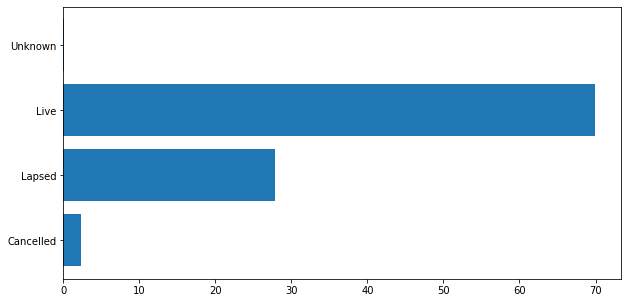

In [9]:
# lets check de amount of Policys by his state
from matplotlib.ticker import FuncFormatter
print("NA ", df['POL_STATUS'].isna().sum())

df.POL_STATUS  = df.POL_STATUS.fillna('Unknown')

d = df.groupby("POL_STATUS")["i"].count()
display(d)

# Graficamos el Estado de las Polizas 
plt.figure(figsize=(10,5))
# show percentages 

plt.barh(d.index, ((d.values *100)/ df.shape[0])).set_label("polizas")

cheking ... 49422
Variable Sexo de acuerdo al Estado de las Polizas


P1_SEX,F,M,N
POL_STATUS,,,
Cancelled,46.65%,53.33%,0.02%
Lapsed,40.64%,59.31%,0.05%
Live,47.34%,52.62%,0.04%
Unknown,56.25%,43.75%,0.00%
All,45.46%,54.49%,0.05%


<AxesSubplot:xlabel='POL_STATUS'>

<Figure size 720x360 with 0 Axes>

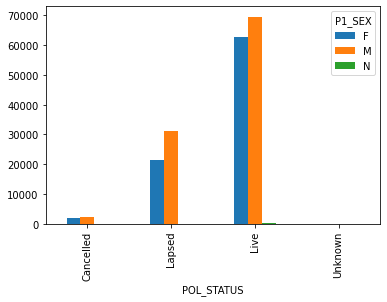

In [28]:
# Conociendo a los asegurados
# Variable Sexo de nuestros afiliados
# print(print("cheking null de la var sexo: ",df.isna().sum()))
# df.POL_STATUS  = df.POL_STATUS.fillna('Unknown')
#df['P1_SEX'] = df['P1_SEX'].fillna(0)

print("cheking ...",df['P1_SEX'].isna().sum())
plt.figure(figsize=(10,5))

tabla_sexo = pd.crosstab([df.POL_STATUS], df.P1_SEX, margins = True, normalize = 'index').style.format('{:.2%}')
print("Variable Sexo de acuerdo al Estado de las Polizas")
display(tabla_sexo,  pd.crosstab([df.POL_STATUS], df.P1_SEX).plot(kind='bar'))

Analizando la Edad de los asegurados.
Vamos a ver la distribucion de edad de los aseguradas y 
tbn vamos a contratastarlas con los estados de las polizas para ver que nos muestran los datos.

In [30]:
# Analizamos la variable Edad, para eso la creamos apartir de la dif entre la fecha de nac y la fecha actual.
# P1_DOB: Date of birth of the client
import datetime as dt 
curdate = dt.date.today()

#Conversion de object a datetime
df['P1_DOB'] = df['P1_DOB'].astype("string")
df['P1_DOB'] = pd.to_datetime(df['P1_DOB'], format="d%/m%/Y")

#df["cur_date"] = curdate 
df["Age"] = (pd.Timestamp('now').year - pd.to_datetime(df["P1_DOB"]).dt.year)
df.head(5)
#print(df.tail(3))

,QUOTE_DATE,COVER_START,CLAIM3YEARS,P1_EMP_STATUS,P1_PT_EMP_STATUS,BUS_USE,CLERICAL,AD_BUILDINGS,RISK_RATED_AREA_B,SUM_INSURED_BUILDINGS,NCD_GRANTED_YEARS_B,AD_CONTENTS,RISK_RATED_AREA_C,SUM_INSURED_CONTENTS,NCD_GRANTED_YEARS_C,CONTENTS_COVER,BUILDINGS_COVER,SPEC_SUM_INSURED,SPEC_ITEM_PREM,UNSPEC_HRP_PREM,P1_DOB,P1_MAR_STATUS,P1_POLICY_REFUSED,P1_SEX,APPR_ALARM,APPR_LOCKS,BEDROOMS,ROOF_CONSTRUCTION,WALL_CONSTRUCTION,FLOODING,LISTED,MAX_DAYS_UNOCC,NEIGH_WATCH,OCC_STATUS,OWNERSHIP_TYPE,PAYING_GUESTS,PROP_TYPE,SAFE_INSTALLED,SEC_DISC_REQ,SUBSIDENCE,YEARBUILT,CAMPAIGN_DESC,PAYMENT_METHOD,PAYMENT_FREQUENCY,LEGAL_ADDON_PRE_REN,LEGAL_ADDON_POST_REN,HOME_EM_ADDON_PRE_REN,HOME_EM_ADDON_POST_REN,GARDEN_ADDON_PRE_REN,GARDEN_ADDON_POST_REN,KEYCARE_ADDON_PRE_REN,KEYCARE_ADDON_POST_REN,HP1_ADDON_PRE_REN,HP1_ADDON_POST_REN,HP2_ADDON_PRE_REN,HP2_ADDON_POST_REN,HP3_ADDON_PRE_REN,HP3_ADDON_POST_REN,MTA_FLAG,MTA_FAP,MTA_APRP,MTA_DATE,LAST_ANN_PREM_GROSS,POL_STATUS,i,Police,Fem,Male,"(F,)","(M,)","(N,)",Age
215351,NaN,14/01/2003,N,R,NaN,N,NaN,Y,3.0,1000000.0,6.0,Y,10.0,50000.0,6.0,Y,Y,0.0,0.0,0.0,1890-01-01,O,N,F,N,Y,2.0,11.0,15.0,Y,3.0,0.0,N,PH,8.0,0.0,2.0,N,Y,N,1900.0,NaN,PureDD,1.0,N,N,Y,N,N,N,N,N,N,N,N,Y,N,N,N,NaN,NaN,NaN,240.18,Live,215352.0,P215352,132.0,NaN,NaN,NaN,NaN,132.0
187076,NaN,01/01/1996,N,R,NaN,N,NaN,Y,5.0,1000000.0,6.0,Y,7.0,50000.0,6.0,Y,Y,0.0,0.0,0.0,1901-09-15,O,N,F,N,Y,3.0,11.0,15.0,Y,3.0,0.0,Y,PH,3.0,0.0,19.0,N,Y,N,1946.0,NaN,PureDD,1.0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,156.7,156.7,01/01/2010,156.70,Lapsed,187077.0,P187077,121.0,retired,0.0,1.0,0.0,121.0
17250,NaN,01/03/2007,N,R,NaN,N,NaN,Y,2.0,1000000.0,6.0,Y,4.0,50000.0,6.0,Y,Y,0.0,0.0,0.0,1903-09-03,P,N,M,Y,Y,3.0,11.0,15.0,Y,3.0,0.0,N,PH,8.0,0.0,1.0,N,Y,N,1980.0,NaN,PureDD,1.0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,NaN,NaN,NaN,128.26,Cancelled,17251.0,P017251,119.0,retired,1.0,0.0,0.0,119.0
120929,NaN,16/11/2004,N,R,NaN,N,NaN,Y,NaN,1000000.0,6.0,Y,3.0,50000.0,6.0,Y,Y,0.0,0.0,0.0,1904-06-05,P,N,M,N,N,3.0,11.0,15.0,Y,3.0,0.0,N,PH,8.0,0.0,10.0,N,N,N,1920.0,NaN,PureDD,1.0,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,NaN,NaN,NaN,208.94,Live,120930.0,P120930,118.0,retired,1.0,0.0,0.0,118.0
233358,NaN,06/12/2000,Y,R,NaN,N,NaN,Y,16.0,1000000.0,3.0,Y,17.0,50000.0,3.0,Y,Y,0.0,0.0,0.0,1905-06-15,O,N,M,N,Y,3.0,11.0,15.0,Y,3.0,0.0,N,PH,8.0,0.0,2.0,N,Y,N,1920.0,NaN,NonDD,1.0,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,NaN,NaN,NaN,326.41,Lapsed,233359.0,P233359,117.0,retired,NaN,NaN,NaN,117.0


In [31]:
"""
df.loc[df['column_name'].isin(some_values)]
df.loc[(df['column_name'] >= A) & (df['column_name'] <= B)]
# sorting dataframe
data.sort_values("Team", inplace = True)
  
# making boolean series for a team name
filter = data["Team"]=="Atlanta Hawks"
  
# filtering data
data.where(filter, inplace = True)
"""
d = df.loc[df['Age'] == df['Age'].max()]
d

,QUOTE_DATE,COVER_START,CLAIM3YEARS,P1_EMP_STATUS,P1_PT_EMP_STATUS,BUS_USE,CLERICAL,AD_BUILDINGS,RISK_RATED_AREA_B,SUM_INSURED_BUILDINGS,NCD_GRANTED_YEARS_B,AD_CONTENTS,RISK_RATED_AREA_C,SUM_INSURED_CONTENTS,NCD_GRANTED_YEARS_C,CONTENTS_COVER,BUILDINGS_COVER,SPEC_SUM_INSURED,SPEC_ITEM_PREM,UNSPEC_HRP_PREM,P1_DOB,P1_MAR_STATUS,P1_POLICY_REFUSED,P1_SEX,APPR_ALARM,APPR_LOCKS,BEDROOMS,ROOF_CONSTRUCTION,WALL_CONSTRUCTION,FLOODING,LISTED,MAX_DAYS_UNOCC,NEIGH_WATCH,OCC_STATUS,OWNERSHIP_TYPE,PAYING_GUESTS,PROP_TYPE,SAFE_INSTALLED,SEC_DISC_REQ,SUBSIDENCE,YEARBUILT,CAMPAIGN_DESC,PAYMENT_METHOD,PAYMENT_FREQUENCY,LEGAL_ADDON_PRE_REN,LEGAL_ADDON_POST_REN,HOME_EM_ADDON_PRE_REN,HOME_EM_ADDON_POST_REN,GARDEN_ADDON_PRE_REN,GARDEN_ADDON_POST_REN,KEYCARE_ADDON_PRE_REN,KEYCARE_ADDON_POST_REN,HP1_ADDON_PRE_REN,HP1_ADDON_POST_REN,HP2_ADDON_PRE_REN,HP2_ADDON_POST_REN,HP3_ADDON_PRE_REN,HP3_ADDON_POST_REN,MTA_FLAG,MTA_FAP,MTA_APRP,MTA_DATE,LAST_ANN_PREM_GROSS,POL_STATUS,i,Police,Fem,Male,"(F,)","(M,)","(N,)",Age
215351,NaN,14/01/2003,N,R,NaN,N,NaN,Y,3.0,1000000.0,6.0,Y,10.0,50000.0,6.0,Y,Y,0.0,0.0,0.0,1890-01-01,O,N,F,N,Y,2.0,11.0,15.0,Y,3.0,0.0,N,PH,8.0,0.0,2.0,N,Y,N,1900.0,NaN,PureDD,1.0,N,N,Y,N,N,N,N,N,N,N,N,Y,N,N,N,NaN,NaN,NaN,240.18,Live,215352.0,P215352,132.0,NaN,NaN,NaN,NaN,132.0


In [33]:
# (189021, 67)
d = pd.notna(df).sum()
d

QUOTE_DATE           79144
COVER_START         189021
CLAIM3YEARS         189021
P1_EMP_STATUS       189021
P1_PT_EMP_STATUS      1782
                     ...  
Male                189020
(F,)                189021
(M,)                189021
(N,)                189021
Age                 189021
Length: 72, dtype: int64

In [34]:
# sorting dataframe
df.sort_values("Age", inplace = True,ascending=False)
  
# making boolean series for a team name
filtros = df["Age"] > 90
  
# filtering data


df.where(filtros)


,QUOTE_DATE,COVER_START,CLAIM3YEARS,P1_EMP_STATUS,P1_PT_EMP_STATUS,BUS_USE,CLERICAL,AD_BUILDINGS,RISK_RATED_AREA_B,SUM_INSURED_BUILDINGS,NCD_GRANTED_YEARS_B,AD_CONTENTS,RISK_RATED_AREA_C,SUM_INSURED_CONTENTS,NCD_GRANTED_YEARS_C,CONTENTS_COVER,BUILDINGS_COVER,SPEC_SUM_INSURED,SPEC_ITEM_PREM,UNSPEC_HRP_PREM,P1_DOB,P1_MAR_STATUS,P1_POLICY_REFUSED,P1_SEX,APPR_ALARM,APPR_LOCKS,BEDROOMS,ROOF_CONSTRUCTION,WALL_CONSTRUCTION,FLOODING,LISTED,MAX_DAYS_UNOCC,NEIGH_WATCH,OCC_STATUS,OWNERSHIP_TYPE,PAYING_GUESTS,PROP_TYPE,SAFE_INSTALLED,SEC_DISC_REQ,SUBSIDENCE,YEARBUILT,CAMPAIGN_DESC,PAYMENT_METHOD,PAYMENT_FREQUENCY,LEGAL_ADDON_PRE_REN,LEGAL_ADDON_POST_REN,HOME_EM_ADDON_PRE_REN,HOME_EM_ADDON_POST_REN,GARDEN_ADDON_PRE_REN,GARDEN_ADDON_POST_REN,KEYCARE_ADDON_PRE_REN,KEYCARE_ADDON_POST_REN,HP1_ADDON_PRE_REN,HP1_ADDON_POST_REN,HP2_ADDON_PRE_REN,HP2_ADDON_POST_REN,HP3_ADDON_PRE_REN,HP3_ADDON_POST_REN,MTA_FLAG,MTA_FAP,MTA_APRP,MTA_DATE,LAST_ANN_PREM_GROSS,POL_STATUS,i,Police,Fem,Male,"(F,)","(M,)","(N,)",Age
215351,NaN,14/01/2003,N,R,NaN,N,NaN,Y,3.0,1000000.0,6.0,Y,10.0,50000.0,6.0,Y,Y,0.0,0.0,0.0,1890-01-01,O,N,F,N,Y,2.0,11.0,15.0,Y,3.0,0.0,N,PH,8.0,0.0,2.0,N,Y,N,1900.0,NaN,PureDD,1.0,N,N,Y,N,N,N,N,N,N,N,N,Y,N,N,N,NaN,NaN,NaN,240.18,Live,215352.0,P215352,132.0,NaN,NaN,NaN,NaN,132.0
187076,NaN,01/01/1996,N,R,NaN,N,NaN,Y,5.0,1000000.0,6.0,Y,7.0,50000.0,6.0,Y,Y,0.0,0.0,0.0,1901-09-15,O,N,F,N,Y,3.0,11.0,15.0,Y,3.0,0.0,Y,PH,3.0,0.0,19.0,N,Y,N,1946.0,NaN,PureDD,1.0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,156.7,156.7,01/01/2010,156.70,Lapsed,187077.0,P187077,121.0,retired,0.0,1.0,0.0,121.0
17250,NaN,01/03/2007,N,R,NaN,N,NaN,Y,2.0,1000000.0,6.0,Y,4.0,50000.0,6.0,Y,Y,0.0,0.0,0.0,1903-09-03,P,N,M,Y,Y,3.0,11.0,15.0,Y,3.0,0.0,N,PH,8.0,0.0,1.0,N,Y,N,1980.0,NaN,PureDD,1.0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,NaN,NaN,NaN,128.26,Cancelled,17251.0,P017251,119.0,retired,1.0,0.0,0.0,119.0
120929,NaN,16/11/2004,N,R,NaN,N,NaN,Y,NaN,1000000.0,6.0,Y,3.0,50000.0,6.0,Y,Y,0.0,0.0,0.0,1904-06-05,P,N,M,N,N,3.0,11.0,15.0,Y,3.0,0.0,N,PH,8.0,0.0,10.0,N,N,N,1920.0,NaN,PureDD,1.0,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,NaN,NaN,NaN,208.94,Live,120930.0,P120930,118.0,retired,1.0,0.0,0.0,118.0
233358,NaN,06/12/2000,Y,R,NaN,N,NaN,Y,16.0,1000000.0,3.0,Y,17.0,50000.0,3.0,Y,Y,0.0,0.0,0.0,1905-06-15,O,N,M,N,Y,3.0,11.0,15.0,Y,3.0,0.0,N,PH,8.0,0.0,2.0,N,Y,N,1920.0,NaN,NonDD,1.0,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,NaN,NaN,NaN,326.41,Lapsed,233359.0,P233359,117.0,retired,NaN,NaN,NaN,117.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Edad max: 132.0
Edad min: 31.0
Edad promedio: 82.63659593378513
Edad mediana: 83.0


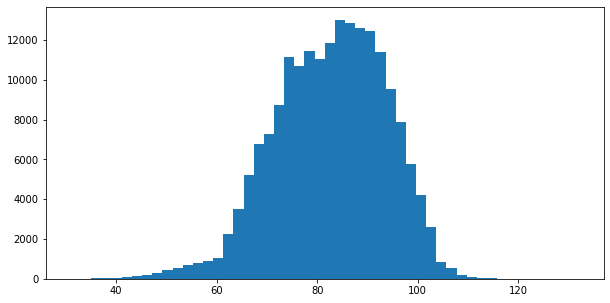

In [46]:

print("Edad max:", df["Age"].max())
print("Edad min:", df["Age"].min())
print("Edad promedio:", df["Age"].mean())
print("Edad mediana:", df["Age"].median())

plt.figure(figsize=(10,5))
plt.hist(df["Age"], bins=50)
plt.show()


In [17]:
# Agrupamos por Edad     # rango de 20 años ..labels = [ "{0} - {1}".format(i, i + 9) for i in range(0, 140, 20) ] c = pd.cut(df.index, np.arange(0, 140, 20),  include_lowest=True, right=False, labels=labels)

bins= [0,35,50,65, 140 ]
labels = ['young','young_adult','adults','retired']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df.head(5)
df.tail(5)

,QUOTE_DATE,COVER_START,CLAIM3YEARS,P1_EMP_STATUS,P1_PT_EMP_STATUS,BUS_USE,CLERICAL,AD_BUILDINGS,RISK_RATED_AREA_B,SUM_INSURED_BUILDINGS,NCD_GRANTED_YEARS_B,AD_CONTENTS,RISK_RATED_AREA_C,SUM_INSURED_CONTENTS,NCD_GRANTED_YEARS_C,CONTENTS_COVER,BUILDINGS_COVER,SPEC_SUM_INSURED,SPEC_ITEM_PREM,UNSPEC_HRP_PREM,P1_DOB,P1_MAR_STATUS,P1_POLICY_REFUSED,P1_SEX,APPR_ALARM,APPR_LOCKS,BEDROOMS,ROOF_CONSTRUCTION,WALL_CONSTRUCTION,FLOODING,LISTED,MAX_DAYS_UNOCC,NEIGH_WATCH,OCC_STATUS,OWNERSHIP_TYPE,PAYING_GUESTS,PROP_TYPE,SAFE_INSTALLED,SEC_DISC_REQ,SUBSIDENCE,YEARBUILT,CAMPAIGN_DESC,PAYMENT_METHOD,PAYMENT_FREQUENCY,LEGAL_ADDON_PRE_REN,LEGAL_ADDON_POST_REN,HOME_EM_ADDON_PRE_REN,HOME_EM_ADDON_POST_REN,GARDEN_ADDON_PRE_REN,GARDEN_ADDON_POST_REN,KEYCARE_ADDON_PRE_REN,KEYCARE_ADDON_POST_REN,HP1_ADDON_PRE_REN,HP1_ADDON_POST_REN,HP2_ADDON_PRE_REN,HP2_ADDON_POST_REN,HP3_ADDON_PRE_REN,HP3_ADDON_POST_REN,MTA_FLAG,MTA_FAP,MTA_APRP,MTA_DATE,LAST_ANN_PREM_GROSS,POL_STATUS,i,Police,Age,AgeGroup
90246,11/16/2010,18/11/2010,N,S,NaN,Y,N,N,NaN,0.0,0.0,Y,0.0,50000.0,1.0,N,Y,200.0,6.07,0.0,1988-06-15,S,N,F,N,Y,2.0,19.0,15.0,Y,3.0,30.0,N,PH,13.0,0.0,7.0,N,Y,N,1960.0,NaN,NonDD,NaN,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,119.62,-1.44,NaN,119.62,Live,90247,P090247,34,young
211726,2/24/2009,24/02/2009,N,H,NaN,N,NaN,N,NaN,0.0,0.0,Y,6.0,50000.0,3.0,N,Y,0.0,0.00,0.0,1990-01-13,S,N,F,N,N,3.0,11.0,3.0,Y,3.0,0.0,N,PH,11.0,0.0,10.0,N,N,N,1980.0,NaN,PureDD,NaN,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,NaN,NaN,NaN,176.80,Live,211727,P211727,32,young
5228,1/20/2009,21/01/2009,N,E,NaN,N,NaN,N,NaN,0.0,0.0,Y,3.0,50000.0,3.0,N,Y,0.0,0.00,0.0,1990-01-26,S,N,F,N,N,2.0,11.0,15.0,Y,3.0,0.0,N,PH,14.0,0.0,19.0,N,N,N,1960.0,NaN,PureDD,NaN,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,NaN,NaN,NaN,140.58,Live,5229,P005229,32,young
118921,2/1/2011,01/02/2011,N,E,NaN,Y,Y,N,NaN,0.0,0.0,Y,0.0,50000.0,6.0,N,Y,500.0,4.94,0.0,1990-01-02,S,N,F,N,Y,1.0,11.0,15.0,Y,3.0,30.0,N,PH,8.0,0.0,7.0,N,Y,N,1990.0,NaN,NonDD,NaN,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,NaN,NaN,NaN,63.51,Lapsed,118922,P118922,32,young
21830,11/23/2009,24/11/2009,N,F,NaN,N,NaN,N,NaN,0.0,0.0,Y,0.0,50000.0,2.0,N,Y,0.0,0.00,0.0,1991-02-19,S,N,M,N,Y,2.0,11.0,15.0,Y,3.0,0.0,N,PH,3.0,0.0,29.0,N,Y,N,2000.0,NaN,NonDD,NaN,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,NaN,NaN,NaN,203.58,Cancelled,21831,P021831,31,young


In [18]:
cc = pd.crosstab(df['AgeGroup'], df['POL_STATUS'], margins=True)
cc

POL_STATUS,Cancelled,Lapsed,Live,Unknown,All
AgeGroup,,,,,
young,1,1,4,0,6
young_adult,54,186,572,0,812
adults,338,2236,5678,1,8253
retired,3918,50111,125905,15,179949
All,4311,52534,132159,16,189020


In [55]:
# Profesion de los Asegurados: P1_EMP_STATUS
"""
R = Retired,
E = Employed,
N = Not Available,
H = House person,
S = Student ,
U = Unemployed.
"""
df1 = df['P1_EMP_STATUS'].groupby(df.P1_EMP_STATUS).value_counts().sort_values(ascending=False)
print("cant ", df1)
cc1 = pd.crosstab(df['P1_EMP_STATUS'], df['POL_STATUS'], margins=True).sort_values(by="P1_EMP_STATUS" ,ascending=False)
cc1


cant  P1_EMP_STATUS  P1_EMP_STATUS
R              R                146621
E              E                 36398
S              S                  3065
H              H                  1069
U              U                   921
N              N                   754
V              V                    68
A              A                    52
F              F                    29
I              I                    28
C              C                    16
Name: P1_EMP_STATUS, dtype: int64


POL_STATUS,Cancelled,Lapsed,Live,Unknown,All
P1_EMP_STATUS,,,,,
V,0,24,44,0,68
U,28,270,623,0,921
S,96,1120,1848,1,3065
R,2993,39979,103637,12,146621
N,31,215,508,0,754
I,1,14,13,0,28
H,38,354,677,0,1069
F,3,7,19,0,29
E,1120,10537,24738,3,36398


In [ ]:
#  PAYMENT_METHOD:         Método de pago
# PAYMENT_FREQUENCY:      Frequency of payment


In [19]:
# cambiar a variable categorica el valor de sexo (chequear los valores nan, etc)
df['POL_STATUS'] = df['POL_STATUS'].astype("string")
df['P1_SEX'] = df['P1_SEX'].astype("category")
# Utlizando onhotencoder para convertir var categoricas
codificador = OneHotEncoder()

codificacion = codificador.fit_transform(df[['P1_SEX']])

print("-->", type(codificacion))
print(":::->", codificacion)

new_col = pd.DataFrame(codificacion.toarray(), columns=codificador.categories_)

df = pd.concat([df, new_col], axis="columns")

df.head(5)

"""
df_aux = df[['POL_STATUS', 'P1_SEX']]
print(df_aux["POL_STATUS"].head(5))
df_pol = df_aux.groupby(['POL_STATUS']).count().reset_index() 
print(df_pol.head(5))
"""


--> <class 'scipy.sparse._csr.csr_matrix'>
:::->   (0, 0)	1.0
  (1, 0)	1.0
  (2, 1)	1.0
  (3, 1)	1.0
  (4, 1)	1.0
  (5, 1)	1.0
  (6, 0)	1.0
  (7, 1)	1.0
  (8, 0)	1.0
  (9, 1)	1.0
  (10, 0)	1.0
  (11, 0)	1.0
  (12, 1)	1.0
  (13, 0)	1.0
  (14, 1)	1.0
  (15, 0)	1.0
  (16, 0)	1.0
  (17, 0)	1.0
  (18, 1)	1.0
  (19, 1)	1.0
  (20, 0)	1.0
  (21, 0)	1.0
  (22, 0)	1.0
  (23, 0)	1.0
  (24, 0)	1.0
  :	:
  (188996, 1)	1.0
  (188997, 0)	1.0
  (188998, 0)	1.0
  (188999, 1)	1.0
  (189000, 1)	1.0
  (189001, 0)	1.0
  (189002, 1)	1.0
  (189003, 1)	1.0
  (189004, 0)	1.0
  (189005, 1)	1.0
  (189006, 1)	1.0
  (189007, 0)	1.0
  (189008, 0)	1.0
  (189009, 0)	1.0
  (189010, 0)	1.0
  (189011, 1)	1.0
  (189012, 0)	1.0
  (189013, 1)	1.0
  (189014, 1)	1.0
  (189015, 1)	1.0
  (189016, 0)	1.0
  (189017, 0)	1.0
  (189018, 0)	1.0
  (189019, 0)	1.0
  (189020, 1)	1.0


'\ndf_aux = df[[\'POL_STATUS\', \'P1_SEX\']]\nprint(df_aux["POL_STATUS"].head(5))\ndf_pol = df_aux.groupby([\'POL_STATUS\']).count().reset_index() \nprint(df_pol.head(5))\n'

In [20]:
new_col.head()
#df.head(5)

,F,M,N
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


In [21]:
# rename column F
print(df.columns[66])
#df.rename(columns={"('F',)":'Fem', "('M',)":'Male'}, inplace=True)
df.rename({df.columns[66]:'Fem', df.columns[67]:'Male'}, inplace=True, axis=1)
df.head()

Age


,QUOTE_DATE,COVER_START,CLAIM3YEARS,P1_EMP_STATUS,P1_PT_EMP_STATUS,BUS_USE,CLERICAL,AD_BUILDINGS,RISK_RATED_AREA_B,SUM_INSURED_BUILDINGS,NCD_GRANTED_YEARS_B,AD_CONTENTS,RISK_RATED_AREA_C,SUM_INSURED_CONTENTS,NCD_GRANTED_YEARS_C,CONTENTS_COVER,BUILDINGS_COVER,SPEC_SUM_INSURED,SPEC_ITEM_PREM,UNSPEC_HRP_PREM,P1_DOB,P1_MAR_STATUS,P1_POLICY_REFUSED,P1_SEX,APPR_ALARM,APPR_LOCKS,BEDROOMS,ROOF_CONSTRUCTION,WALL_CONSTRUCTION,FLOODING,LISTED,MAX_DAYS_UNOCC,NEIGH_WATCH,OCC_STATUS,OWNERSHIP_TYPE,PAYING_GUESTS,PROP_TYPE,SAFE_INSTALLED,SEC_DISC_REQ,SUBSIDENCE,YEARBUILT,CAMPAIGN_DESC,PAYMENT_METHOD,PAYMENT_FREQUENCY,LEGAL_ADDON_PRE_REN,LEGAL_ADDON_POST_REN,HOME_EM_ADDON_PRE_REN,HOME_EM_ADDON_POST_REN,GARDEN_ADDON_PRE_REN,GARDEN_ADDON_POST_REN,KEYCARE_ADDON_PRE_REN,KEYCARE_ADDON_POST_REN,HP1_ADDON_PRE_REN,HP1_ADDON_POST_REN,HP2_ADDON_PRE_REN,HP2_ADDON_POST_REN,HP3_ADDON_PRE_REN,HP3_ADDON_POST_REN,MTA_FLAG,MTA_FAP,MTA_APRP,MTA_DATE,LAST_ANN_PREM_GROSS,POL_STATUS,i,Police,Fem,Male,"(F,)","(M,)","(N,)"
215351,NaN,14/01/2003,N,R,NaN,N,NaN,Y,3.0,1000000.0,6.0,Y,10.0,50000.0,6.0,Y,Y,0.0,0.0,0.0,1890-01-01,O,N,F,N,Y,2.0,11.0,15.0,Y,3.0,0.0,N,PH,8.0,0.0,2.0,N,Y,N,1900.0,NaN,PureDD,1.0,N,N,Y,N,N,N,N,N,N,N,N,Y,N,N,N,NaN,NaN,NaN,240.18,Live,215352.0,P215352,132.0,NaN,NaN,NaN,NaN
187076,NaN,01/01/1996,N,R,NaN,N,NaN,Y,5.0,1000000.0,6.0,Y,7.0,50000.0,6.0,Y,Y,0.0,0.0,0.0,1901-09-15,O,N,F,N,Y,3.0,11.0,15.0,Y,3.0,0.0,Y,PH,3.0,0.0,19.0,N,Y,N,1946.0,NaN,PureDD,1.0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,156.7,156.7,01/01/2010,156.70,Lapsed,187077.0,P187077,121.0,retired,0.0,1.0,0.0
17250,NaN,01/03/2007,N,R,NaN,N,NaN,Y,2.0,1000000.0,6.0,Y,4.0,50000.0,6.0,Y,Y,0.0,0.0,0.0,1903-09-03,P,N,M,Y,Y,3.0,11.0,15.0,Y,3.0,0.0,N,PH,8.0,0.0,1.0,N,Y,N,1980.0,NaN,PureDD,1.0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,NaN,NaN,NaN,128.26,Cancelled,17251.0,P017251,119.0,retired,1.0,0.0,0.0
120929,NaN,16/11/2004,N,R,NaN,N,NaN,Y,NaN,1000000.0,6.0,Y,3.0,50000.0,6.0,Y,Y,0.0,0.0,0.0,1904-06-05,P,N,M,N,N,3.0,11.0,15.0,Y,3.0,0.0,N,PH,8.0,0.0,10.0,N,N,N,1920.0,NaN,PureDD,1.0,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,NaN,NaN,NaN,208.94,Live,120930.0,P120930,118.0,retired,1.0,0.0,0.0
233358,NaN,06/12/2000,Y,R,NaN,N,NaN,Y,16.0,1000000.0,3.0,Y,17.0,50000.0,3.0,Y,Y,0.0,0.0,0.0,1905-06-15,O,N,M,N,Y,3.0,11.0,15.0,Y,3.0,0.0,N,PH,8.0,0.0,2.0,N,Y,N,1920.0,NaN,NonDD,1.0,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,NaN,NaN,NaN,326.41,Lapsed,233359.0,P233359,117.0,retired,NaN,NaN,NaN


In [22]:
# convirtirndo var Polocy status a numerica
# POL_STATUS                                
# Cancelled = 3
# Lapsed   = 2
# Live     = 1
# Unknown = -1
"""polocy_dic = {'Unknown':-1, 'Live': 1, 'Lapsed':2, 'Cancelled':3}
df['POL_STATUS'] = df['POL_STATUS'].map(polocy_dic)

voy a utilizar onehotEncoder para convertir a categoria a numerica

df_aux = df[['POL_STATUS', 'Fem', 'Male']].query("POL_STATUS == 'Cancelled'")
"""
df_aux = df[['POL_STATUS', 'Fem', 'Male']]


#df_aux = df[['POL_STATUS', 'Male']].query("POL_STATUS == 'Cancelled' and Male == 1.0")
print("pol status cancelled: ", df_aux.head())

df_pol = df_aux.groupby(['Fem', 'Male', 'POL_STATUS']).size().reset_index()

print("pol status groupped by: ")
print(df_pol.head())


pol status cancelled:         POL_STATUS    Fem     Male
215351       Live  132.0      NaN
187076     Lapsed  121.0  retired
17250   Cancelled  119.0  retired
120929       Live  118.0  retired
233358     Lapsed  117.0  retired
pol status groupped by: 
    Fem         Male POL_STATUS  0
0  31.0        young  Cancelled  1
1  31.0        young     Lapsed  0
2  31.0        young       Live  0
3  31.0        young    Unknown  0
4  31.0  young_adult  Cancelled  0


In [23]:
#df_pol.plot(kind='bar', title="Cantidad de Estados de Poliza").legend(bbox_to_anchor= (1.02, 1));
# BUS_USE: Indicador de uso comercial
d = df['P1_SEX'].value_counts()
print("-->", d[["M"]])
df_pol[['P1_EMP_STATUS', 'P1_SEX']].plot(kind="bar", title="cant polizas x estado")

print(d)
df[['POL_STATUS']].astype("category")

--> M    103003
Name: P1_SEX, dtype: int64


KeyError: "None of [Index(['P1_EMP_STATUS', 'P1_SEX'], dtype='object')] are in the [columns]"

<AxesSubplot:>

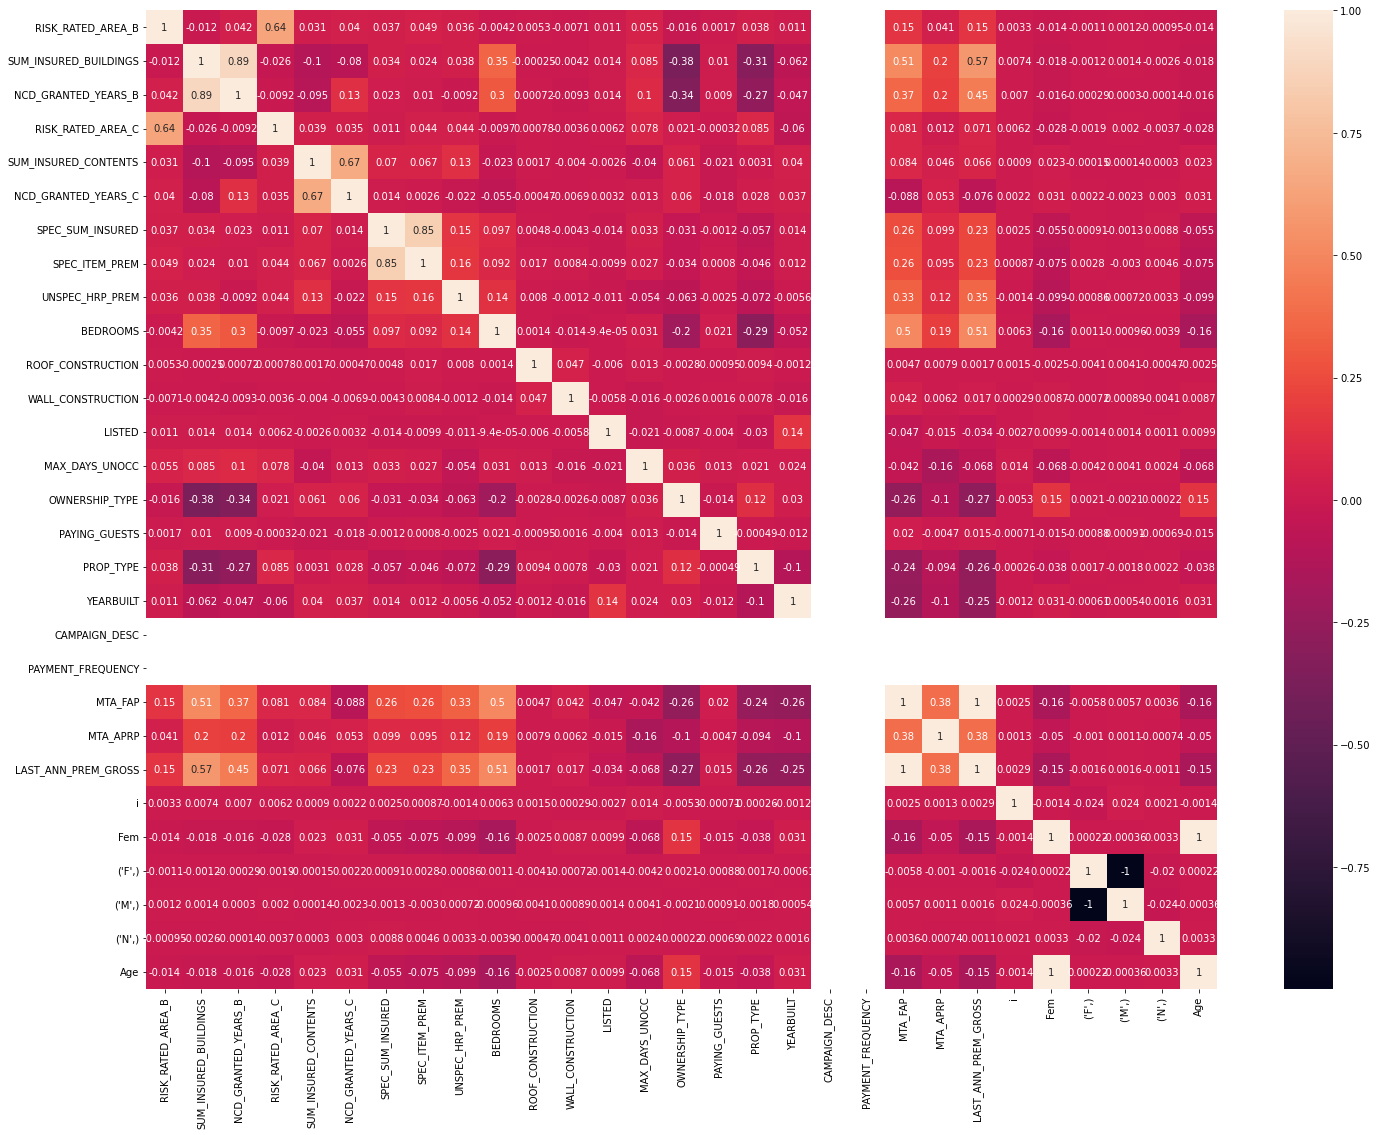

In [57]:
#Definimos la matriz de correlación como la fuente de nuestros datos
corr = df.corr()

#Definimos el tamaño de la figura para asegurar que se observen los valores interiores
ax = plt.subplots(figsize=(24,18))

#Generamos una máscara para evitar tener un espejo en la parte superior de la gráfica y simplificar la observación
#mask = np.zeros_like(corr)
#mask[np.triu_indices_from(mask)] = True

#Usando seaborn heatmap como tipo de gráfica, colocamos los valores, solicitamos que incluya las anotaciones y seleccionamos un mapa de color,
# en este caso utilizamos "viridis" y seleccionamos la máscara para no mostrar los datos duplicados, iniciando por la diagonal de unos en la 
# parte central de la gráfica
#ax = sbn.heatmap(corr,annot=True,mask = mask) # cmap='viridis'
ax = sbn.heatmap(corr,annot=True) # cmap='viridis'
ax

In [ ]:
cor = df.corr()
print("correlation de estado de la poliza = Pol_Status")
print(cor[["POL_STATUS"]].sort_values(by="POL_STATUS", ascending=False).head(5))
print("correlation de ")
print(cor[["POL_STATUS"]].sort_values(by="POL_STATUS", ascending=False).head(5))

,POL_STATUS
POL_STATUS,1.000000
MAX_DAYS_UNOCC,0.143808
SUM_INSURED_BUILDINGS,0.107597
NCD_GRANTED_YEARS_B,0.093892
RISK_RATED_AREA_B,0.089034


<AxesSubplot:xlabel='Age', ylabel='POL_STATUS'>

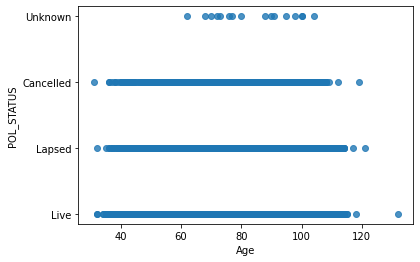

In [60]:
import seaborn as sns
sns.regplot(x=df["Age"], y=df["POL_STATUS"], fit_reg=False)

In [ ]:
"""Skylearn Normalizacion, centrado y escalado
Vamos a trabajar con las columnas speed, satellites y precision, aqui vamos a utilizar una funcion de sklearn para hacer este preprocesado. 
Hay muchas formas de escalar y estandarizar valores, en este caso vamos a utilizar una tecnica para dejar los valores entre -1 y 1. 
El framework sklearn tiene una buena paleta de funciones para realizar preparacion de datos

from sklearn import preprocessing

columna_speed = df['speed'].values #Devuelve numpy
min_max_scaler = preprocessing.MinMaxScaler()
columna_speed_scaled = min_max_scaler.fit_transform(columna_speed.reshape(-1, 1))
columna_speed_scaled
"""




In [ ]:
#ramdomforest classifier
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as cr
from sklearn.metrics import roc_auc_score as roc

